In [2]:
import torch
import collections

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from FLTrack.models import ShallowNN
from FLTrack.evals import evaluate, euclidean_distance
from FLTrack.evals import hessian_eccentricity

features = 197
batch_size = 64
loss_fn = torch.nn.L1Loss()

In [3]:
client_ids = [f"{i}_{j}" for i in range(4) for j in range(6)]

In [3]:
df_dict = {}
for iter in range(1,21):
    
    global_matrix_dict = {
        key: torch.load(f"hessians/saving/{iter}/{key}.pth")
        for key in client_ids
    }
    
    print("loaded matrix dict " + str(iter))
    hess_ecc = hessian_eccentricity(global_matrix_dict,euclidean_distance)
    
    df_dict[iter] = hess_ecc
    
    del global_matrix_dict
    del hess_ecc

loaded matrix dict 1
tensor(10952.3545)
tensor(12246.9053)
tensor(15798.4004)
tensor(19216.6777)
tensor(16311.7803)
tensor(12837.5146)
tensor(10514.9199)
tensor(10740.4199)
tensor(13397.7705)
tensor(19856.8984)
tensor(12575.0615)
tensor(12587.5889)
tensor(9375.9268)
tensor(9203.4189)
tensor(9749.4844)
tensor(9684.1475)
tensor(9862.7002)
tensor(9915.9697)
tensor(9598.2520)
tensor(9754.2617)
tensor(10088.4082)
tensor(10489.4736)
tensor(10406.9395)
tensor(10726.6934)
loaded matrix dict 2
tensor(13112.7715)
tensor(13796.7900)
tensor(18651.9238)
tensor(24351.6562)
tensor(18639.9082)
tensor(14769.7695)
tensor(11962.0488)
tensor(12008.5166)
tensor(15912.8086)
tensor(23777.5195)
tensor(14363.7510)
tensor(14365.2100)
tensor(10856.8252)
tensor(11053.8477)
tensor(10620.8457)
tensor(10852.9307)
tensor(10880.5088)
tensor(10904.5879)
tensor(11607.9287)
tensor(11624.4883)
tensor(12306.8125)
tensor(12647.3779)
tensor(12640.1377)
tensor(13222.4785)
loaded matrix dict 3
tensor(14481.1514)
tensor(15413.5

tensor(29862.3945)
tensor(24765.2812)
tensor(21189.6582)
tensor(21775.2734)
tensor(28659.3945)
tensor(41482.4297)
tensor(25492.6504)
tensor(24425.5742)
tensor(19839.1094)
tensor(19219.8574)
tensor(19572.2148)
tensor(20142.3867)
tensor(19599.9902)
tensor(19496.9258)
tensor(21886.6152)
tensor(21665.3262)
tensor(20998.3438)
tensor(21771.1719)
tensor(20884.6250)
tensor(21654.2715)
loaded matrix dict 19
tensor(23450.1777)
tensor(23832.3242)
tensor(28523.7773)
tensor(41995.9688)
tensor(29895.6758)
tensor(25105.3809)
tensor(21422.0273)
tensor(21976.4160)
tensor(28365.7305)
tensor(42309.3242)
tensor(25097.4434)
tensor(24722.1348)
tensor(20068.6797)
tensor(19415.2383)
tensor(19857.7578)
tensor(20154.2109)
tensor(19693.7676)
tensor(19681.2656)
tensor(21975.0508)
tensor(21774.9863)
tensor(21069.8867)
tensor(22017.8867)
tensor(20961.2969)
tensor(21778.7441)
loaded matrix dict 20
tensor(24242.3086)
tensor(24398.6406)
tensor(29879.7266)
tensor(44093.9688)
tensor(31323.8535)
tensor(25709.1074)
tensor

In [55]:
#data = pd.DataFrame(df_dict)

In [59]:
#data.to_csv("insights/ecc_over_iterations_hess.csv", index=False)

In [8]:
data = pd.read_csv("insights/ecc_over_iterations_hess.csv")
data['average_parameter_ecc'] = data.apply( lambda row: round(row.mean(),4), axis=1)

In [9]:
data

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,average_parameter_ecc
0,0.0383,0.0392,0.0392,0.0395,0.0400,0.0400,0.0400,0.0406,0.0408,0.0409,...,0.0408,0.0408,0.0404,0.0404,0.0403,0.0402,0.0399,0.0401,0.0400,0.0401
1,0.0428,0.0412,0.0417,0.0420,0.0419,0.0420,0.0415,0.0422,0.0421,0.0420,...,0.0416,0.0417,0.0410,0.0409,0.0407,0.0408,0.0405,0.0407,0.0402,0.0414
2,0.0553,0.0557,0.0553,0.0550,0.0544,0.0537,0.0534,0.0528,0.0529,0.0525,...,0.0518,0.0508,0.0506,0.0505,0.0504,0.0500,0.0496,0.0487,0.0493,0.0522
3,0.0672,0.0727,0.0743,0.0746,0.0731,0.0719,0.0708,0.0678,0.0642,0.0640,...,0.0648,0.0649,0.0682,0.0696,0.0704,0.0705,0.0707,0.0718,0.0727,0.0695
4,0.0571,0.0557,0.0536,0.0528,0.0519,0.0516,0.0518,0.0517,0.0523,0.0521,...,0.0517,0.0512,0.0515,0.0513,0.0513,0.0514,0.0514,0.0511,0.0517,0.0523
5,0.0449,0.0441,0.0430,0.0425,0.0424,0.0423,0.0422,0.0424,0.0423,0.0422,...,0.0424,0.0424,0.0424,0.0423,0.0425,0.0426,0.0426,0.0429,0.0424,0.0427
6,0.0368,0.0357,0.0354,0.0352,0.0354,0.0355,0.0355,0.0361,0.0367,0.0371,...,0.0369,0.0371,0.0367,0.0365,0.0363,0.0366,0.0365,0.0366,0.0362,0.0363
7,0.0376,0.0359,0.0358,0.0360,0.0365,0.0368,0.0369,0.0375,0.0377,0.0380,...,0.0378,0.0382,0.0376,0.0374,0.0374,0.0377,0.0375,0.0376,0.0372,0.0372
8,0.0469,0.0475,0.0462,0.0460,0.0465,0.0462,0.0464,0.0465,0.0474,0.0474,...,0.0484,0.0487,0.0491,0.0490,0.0489,0.0488,0.0493,0.0485,0.0495,0.0478
9,0.0695,0.0710,0.0706,0.0695,0.0690,0.0687,0.0683,0.0663,0.0645,0.0647,...,0.0649,0.0657,0.0679,0.0686,0.0704,0.0705,0.0714,0.0723,0.0729,0.0686


In [4]:
result = {}

# Iterate through the input dictionary and reformat the data
for key, sub_dict in df_dict.items():
    for sub_key, value in sub_dict.items():
        if sub_key not in result:
            result[sub_key] = [value]
        else:
            result[sub_key].append(value)

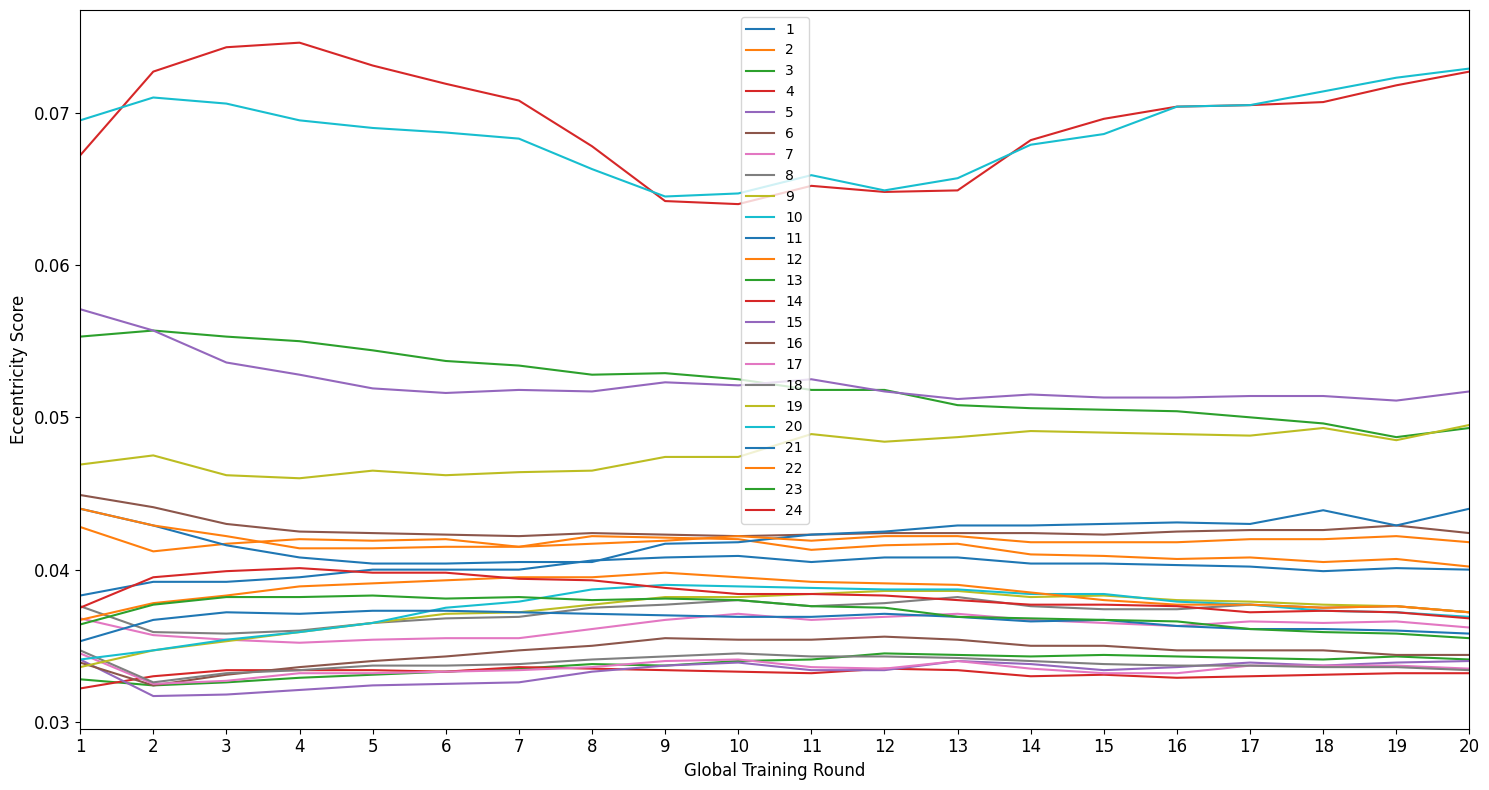

In [5]:
import matplotlib.pyplot as plt

# Define your data
data = result

x_values = list(range(1, 21))

plt.figure(figsize=(15, 8))

for i, (key, values) in enumerate(data.items()):
    if i+1 in (10,12, 2,6,20):
        plt.plot(x_values, values, label=str(i + 1))  # Set legend label from 1 to 24
    else:
        plt.plot(x_values, values, label=str(i + 1))

def legend_without_duplicate_labels(plt):
    handles, labels = plt.gca().get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    plt.legend(*zip(*unique))

plt.xlim(1,len(values))
#plt.ylim(bottom=0.035)
plt.xlabel('Global Training Round', fontsize='large')
plt.ylabel('Eccentricity Score', fontsize='large')
plt.legend(loc='upper right', ncol=4, bbox_to_anchor=(0,0,1,1), fontsize='large', framealpha=1)
legend_without_duplicate_labels(plt)
plt.xticks(x_values, fontsize='large')
plt.yticks(fontsize='large')
plt.tight_layout()
plt.show()

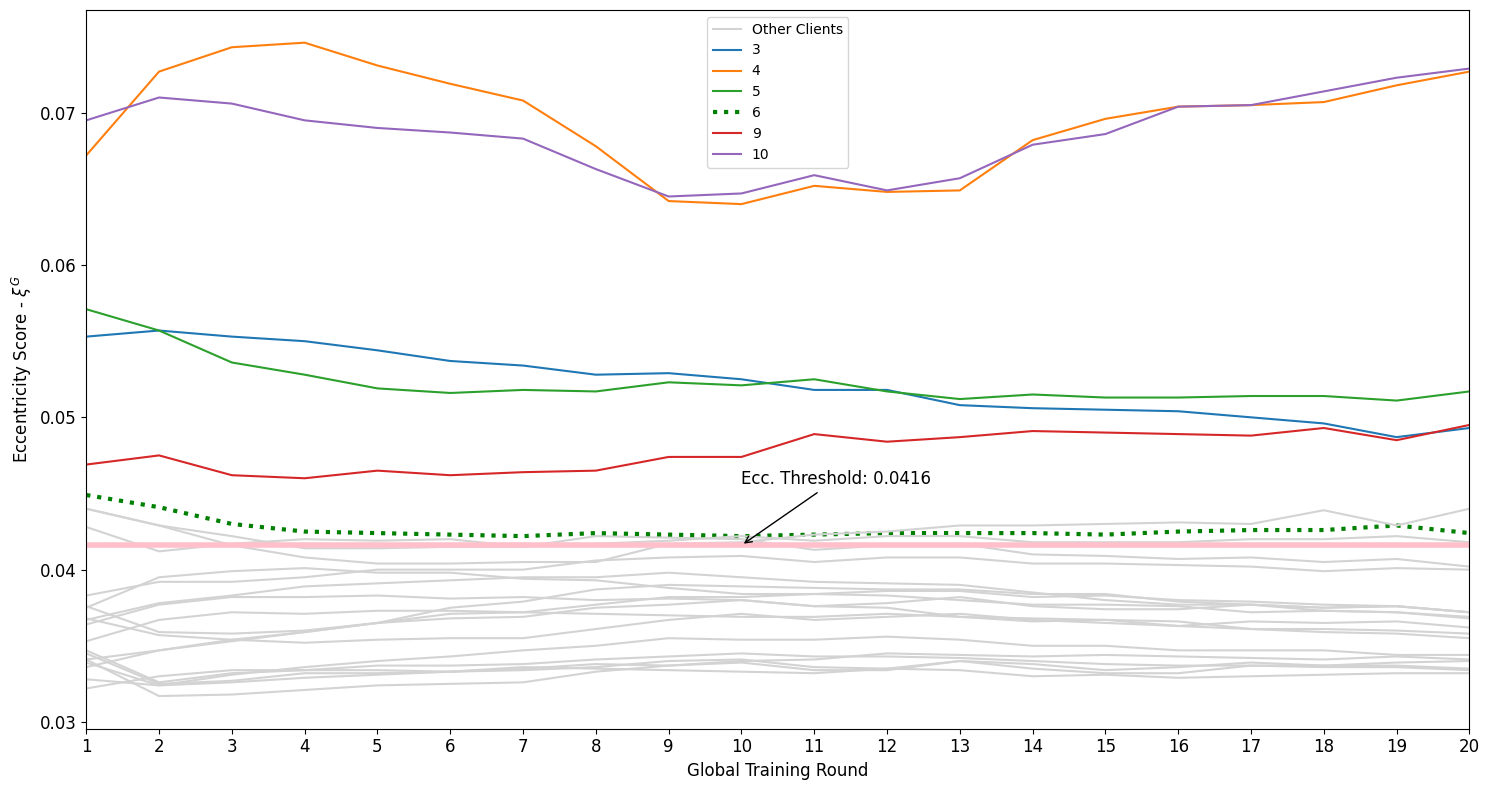

In [34]:
import matplotlib.pyplot as plt

# Define your data
data = result

x_values = list(range(1, 21))

plt.figure(figsize=(15, 8))

for i, (key, values) in enumerate(data.items()):
    if i+1 in (3,4,5,9,10):
        plt.plot(x_values, values, label=str(i + 1))  # Set legend label from 1 to 24
    elif i+1 in [6]:
        plt.plot(x_values, values, color='green', label=str(i + 1),linestyle='dotted',linewidth=3)
    else:
        plt.plot(x_values, values, label='Other Clients', color='lightgray')
else:
    plt.plot(x_values, [0.0416 for i in range(1, 21)], color='pink',linewidth=4)
    annotation_text = "Ecc. Threshold: 0.0416"  
    annotation_x = 10  
    annotation_y = 0.0416  
    plt.annotate(annotation_text, xy=(annotation_x, annotation_y), xytext=(annotation_x, annotation_y + 0.004),
                 arrowprops=dict(arrowstyle="->"),fontsize='large')

def legend_without_duplicate_labels(plt):
    handles, labels = plt.gca().get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    plt.legend(*zip(*unique))

plt.xlim(1,len(values))
#plt.ylim(bottom=0.035)
plt.xlabel('Global Training Round', fontsize='large')
plt.ylabel('Eccentricity Score - $\\xi^G$', fontsize='large')
plt.legend(loc='lower right', ncol=4, bbox_to_anchor=(0,0,1,1), fontsize='large', framealpha=1)
legend_without_duplicate_labels(plt)
plt.xticks(x_values, fontsize='large')
plt.yticks(fontsize='large')
plt.tight_layout()
plt.show()